In [13]:
import argparse
import numpy as np
from get_data import main
from cnn.training import get_trained_model
from knn.knn import KNN
from utils.display.results_display import plot_neighbors, ConfusionMatrix_display
from matplotlib import cm 

In [3]:
parser = argparse.ArgumentParser()
parser.add_argument('--config', help='Path to the config file', default='./default_config.yml')
parser.add_argument('--log-dir', help='Path to the log directory', default='../log/')
parser.add_argument('--posters', help='Path to the posters', default='../data/posters/')
parser.add_argument('--models-dir', help='Path to the saved models', default='../data/models/')
parser.add_argument('--sets-dir', help='Path to the training and testing sets', default='../data/sets/')
parser.add_argument('--database', help='Path to the databse csv', default='../data/poster_data.csv')
parser.add_argument('--csv', help='Path to the clean csv', default='../data/')
parser.add_argument('-s', '--save', help='Save model', action='store_true')
parser.add_argument('-v', '--verbose', help='Verbose', action='store_true')

str_args = '-v -s'.split()
args, _ = parser.parse_known_args(str_args)

In [4]:
clean_movies, train_posters, train_genres, train_ids, test_posters, test_genres, test_ids, model_name, save_model, verbose = main(args)

  2%|█▊                                                                          | 286/11935 [00:00<00:04, 2839.13it/s]

Database already cleaned
Posters database downloading


 67%|██████████████████████████████████████████████████▌                        | 8038/11935 [00:02<00:01, 3101.61it/s]

Error HTTP Error 404: Not Found with film 7639
Error HTTP Error 404: Not Found with film 8090


 82%|█████████████████████████████████████████████████████████████▋             | 9819/11935 [00:03<00:01, 2048.69it/s]

Error HTTP Error 404: Not Found with film 9532


100%|██████████████████████████████████████████████████████████████████████████| 11935/11935 [00:04<00:00, 2838.33it/s]


Database downloaded
Training and testing sets already made


In [5]:
resnet, _ = get_trained_model(model_name)

Loading keras ResNet50V2


# Resnet et KNN 

Création des features : avant-dernière couche de ResNet

In [6]:
train_features_resnet = resnet.predict(train_posters).reshape((len(train_posters), -1))
test_features_resnet = resnet.predict(test_posters).reshape((len(test_posters), -1))

Création et entraînement du kNN

In [14]:
k = 7

knn = KNN(k)
knn.fit(train_features_resnet, train_genres)

KNN(n_neighbors=7, verbose=True, weights='distance')

Prédiction sur le testing set et calcul de l'accuracy

In [15]:
from utils.accuracy import mono_label

predicted_genres = knn.predict(test_features_resnet, train_genres)
mono_label(test_genres, predicted_genres)

  0%|                                                                                          | 0/734 [00:00<?, ?it/s]

Predicting...


100%|████████████████████████████████████████████████████████████████████████████████| 734/734 [03:01<00:00,  4.04it/s]

Prediction done


0.2970027247956403

# Analyse des résultats

In [16]:
import yaml

config = yaml.safe_load(open(args.config))
class_names = {config['genres'][k]: k for k in config['genres'].keys()}

Affichage des plus proches voisins pour quelques posters du testing set

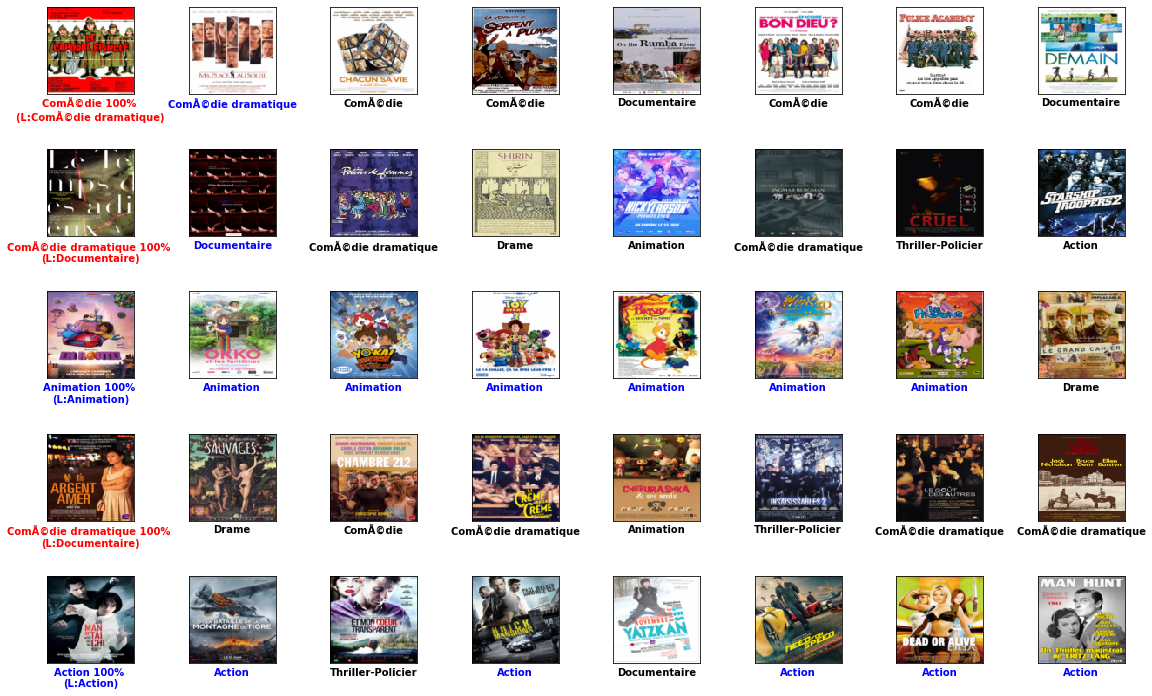

In [17]:
from utils.display.results_display import plot_neighbors
%matplotlib inline

starting_index = np.random.randint(0, 700)
num_images = 5
plot_neighbors(test_posters, test_genres, class_names, predicted_genres, starting_index, num_images, train_posters, train_genres, knn.neighbors)

Affichage de la matrice de confusion 

['Action', 'Animation', 'ComÃ©die', 'ComÃ©die dramatique', 'Documentaire', 'Drame', 'Thriller-Policier']


array([[0.20952381, 0.18095238, 0.16190476, 0.12380952, 0.15238095,
        0.0952381 , 0.07619048],
       [0.08653846, 0.61538462, 0.09615385, 0.04807692, 0.13461538,
        0.        , 0.01923077],
       [0.05714286, 0.34285714, 0.27619048, 0.07619048, 0.13333333,
        0.07619048, 0.03809524],
       [0.17142857, 0.14285714, 0.12380952, 0.21904762, 0.19047619,
        0.08571429, 0.06666667],
       [0.06666667, 0.17142857, 0.0952381 , 0.11428571, 0.44761905,
        0.08571429, 0.01904762],
       [0.12380952, 0.17142857, 0.13333333, 0.12380952, 0.21904762,
        0.12380952, 0.1047619 ],
       [0.15238095, 0.14285714, 0.1047619 , 0.0952381 , 0.19047619,
        0.12380952, 0.19047619]])

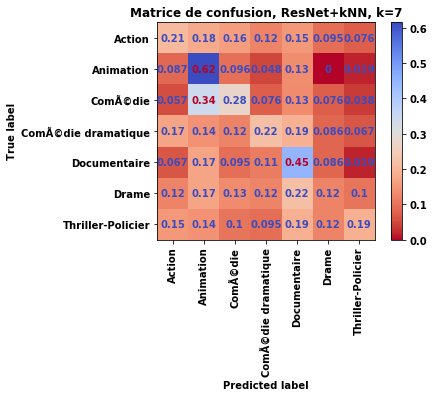

In [18]:
title = 'ResNet+kNN, k='+str(k) 
ConfusionMatrix_display(test_genres, predicted_genres, config['genres'], title)

Histogramme par genres

In [ ]:
from utils.display.results_display import histogram

histogram(test_genres, predicted_genres, k, config['genres'])